# Importando as bibliotecas

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtendo as estatisticas descritivas

In [44]:
covid = pd.read_csv('covid.txt', sep=';', index_col=1, parse_dates=True)
covid.head()

,local,casos_acum,obitos_acum
datahora,,,
2020-02-25,Brasil,0,0
2020-02-26,Brasil,1,0
2020-02-27,Brasil,1,0
2020-02-28,Brasil,1,0
2020-02-29,Brasil,2,0


In [45]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 2020-02-25 to 2021-02-03
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   local        345 non-null    object
 1   casos_acum   345 non-null    int64 
 2   obitos_acum  345 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.8+ KB


In [46]:
covid.describe(percentiles=[0.15, 0.25, 0.50, 0.75, 1.0])

,casos_acum,obitos_acum
count,3.450000e+02,345.000000
mean,3.420150e+06,99229.249275
std,2.925435e+06,73821.947795
min,0.000000e+00,0.000000
15%,3.237920e+04,2054.200000
25%,3.100870e+05,20047.000000
50%,3.317096e+06,107232.000000
75%,5.675032e+06,162628.000000
100%,9.339420e+06,227563.000000
max,9.339420e+06,227563.000000


In [47]:
# exclui a coluna local 
covid = covid.drop('local', axis=1)
covid.head()

,casos_acum,obitos_acum
datahora,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


In [48]:
covid = covid.rename(columns={'casos_acum': 'casos_acumulados', 'obitos_acum':'obitos_acumulados'})
covid.head()

,casos_acumulados,obitos_acumulados
datahora,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


In [49]:
# Cria uma coluna de recuperados derivada das colunas de obitos e casos acumulados
covid['recuperados'] = covid['casos_acumulados'] - covid['obitos_acumulados']
covid.head()

,casos_acumulados,obitos_acumulados,recuperados
datahora,,,
2020-02-25,0,0,0
2020-02-26,1,0,1
2020-02-27,1,0,1
2020-02-28,1,0,1
2020-02-29,2,0,2


In [ ]:
# Cria outras duas colunas que quantifica a variação percentual de casos e obitos
covid['variação_casos'] = covid.casos_acumulados.pct_change()*100
covid['variação_obitos'] = covid.obitos_acumulados.pct_change()*100
covid.head()

# Média Móvel

In [51]:
# Cria outras duas colunas que calcula a média movel de casos e óbitos em uma janela de 5 dias
covid['media_movel_casos'] = covid.casos_acumulados.rolling(window=5).mean()
covid['media_movel_obitos'] = covid.obitos_acumulados.rolling(window=5).mean()

In [52]:
# Preenche os valores ausentes (NaN) com 0
covid = covid.fillna(value=0)
covid.head()

,casos_acumulados,obitos_acumulados,recuperados,variação_casos,variação_obitos,media_movel_casos,media_movel_obitos
datahora,,,,,,,
2020-02-25,0,0,0,0.0,0.0,0.0,0.0
2020-02-26,1,0,1,inf,0.0,0.0,0.0
2020-02-27,1,0,1,0.0,0.0,0.0,0.0
2020-02-28,1,0,1,0.0,0.0,0.0,0.0
2020-02-29,2,0,2,100.0,0.0,1.0,0.0


# Visualizando os dados

Text(0, 0.5, 'Milhões')

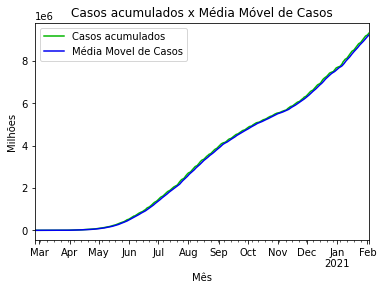

In [86]:
# Plota o grafico comparando os Casos Acumulados com a Média Móvel de Casos
covid['casos_acumulados'].plot(color='#03b700')
covid['media_movel_casos'].plot(color='#0101f1')
plt.title('Casos acumulados x Média Móvel de Casos')
plt.legend(['Casos acumulados', 'Média Movel de Casos'], loc='best')
plt.xlabel('Mês')
plt.ylabel('Milhões')

Text(0, 0.5, 'Mil')

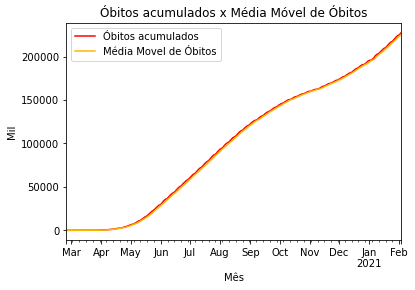

In [83]:
# Plota o grafico comparando os Óbitos Acumulados com a Média Móvel de Óbitos
covid['obitos_acumulados'].plot(color='#ff0000')
covid['media_movel_obitos'].plot(color='#ffb500')
plt.title('Óbitos acumulados x Média Móvel de Óbitos')
plt.legend(['Óbitos acumulados', 'Média Movel de Óbitos'], loc='best')
plt.xlabel('Mês')
plt.ylabel('Mil')

Como podemos Observar a curva da Média móvel de casos e curva de óbitos se aproximam das curvas de Casos acumulados e Óbitos acumulados de Covid-19 no Brasil